# <center>The tip of the iceberg</center>  
<center><i>Mandatory project #1</i></center>  
<center><b>Jianing Shi, Reynel Villabona gonzalez, Atanu Das and John Emeka Udegbunam</b></center>  

<center>Date: <b>12 09 2021</b></center>

In [2]:
%matplotlib inline

# Import the packages we plan to use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rockhound as rh
import cmocean

## <center><b>Abstract</i></center>

The first part of this project gives a clear idea of handling the errors of floating-point arithmetic by using different packages in Python programming language. If we always want to design our own functions for our programs it will be time consuming as well as cannot be always efficient. Rather we can solve these problems by importing some useful Python library more efficiently in a structural way where we have used different classes and also by implementing these packages, we can get an idea how these work in scientific computing field. And at the end part of this project we learnt how to import ice data for Antarctica by using the rockhound library

## Introduction

Python is an object-oriented, high-level programming language [0], which is useful at the moment to analyze big amounts of data, in a precise and efficient way. Having said that, it is important to highlight that in the course of Modeling and computational Engineering We will use it, in order to understand the behavior of the data that we have so we can make better predictions based on it.

To start it is essential to learn how it works, this means we will review main libraries, main functions and how its memory works so we can take at look of the errors that we might see in the future and could affect our calculus.
Further we will see two different methods (Forward difference and Central) to get the derivatives of a function and we will compare it against the numerical derivative, also here we will learn how to plot, and we will be able to see the errors that could occur due to the Binary system that python has to store the numbers. Additionally, we will learn how classes in coding makes us the life easier.

Finally, we will going over data bases and solution of real-life problems, this has the objective to start to make the relationship between our acquired knowledge and applications. Here we will go deep on how to make nicer plots and solve-through-analyze problems.

At the end we will show the insights that each of us get from each exercise and what we learnt from them

## Exercise 1: Finit-precision arithmetic  

### Part 1. Run the following code snippet:

In [ ]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

* **Explain the meaning of the the printed-out number,using the IEEE Standard for floating-point arithemtic.**  
  **max** : The maximum representable positive finite float.  
  **max\_exp**: The maximum integer $\it e\,$ such that ${\rm base}^{(\it e-1)}\,$ is a representable finite float.  
  **max\_10\_exp**: The maximum integer $\it e\,$ such that ${10}^{\it e}\,$ is in the range of representable finite floats.  
    **min**: The minimum representable positive normalized float.  
    **min\_exp**: The minimum integer $\it e\,$ such that ${\rm base}^{(\it e-1)}\,$ is a normalized float.  
    **min\_10\_exp**: The minimum integer $\it e\,$ such that ${10}^{\it e}\,$ is a normalized float.  
    **dig**: The maximum number of decimal digits that can be faithfully represented in a float.  
    **mant_dig**: The float precision: the number of base-radix digits in the significand of a float.  
    **epsilon**: The difference between 1.0 and the least value greater than 1.0 that is representable as a float.  
    **radix**: The radix of exponent representation.  
    **rounds**: The integer constant representing the rounding mode used for arithmetic operations.  

### Part 2.
* **Derive the following values yourself: *max*, *min*, *epsilon*.**  
  **max** : For the “IEEE 754”about the precision floating point number, there are 11 bits for the exponent and 52 bits for the fraction. The exponent is an 11-bit biased as $2^{10}–1=1023$. Thus, the largest number we can get is the exponent 11111111110 which in decimal is 1023.  
  
  $$ \underbrace{1.1111\ldots11\times 2^{1023}}_{\rm Binary\,Scientific} = \underbrace{0\,11111111110\,111\cdots11}_{\rm Binary\,Floating}2 $$ 
  
  So we can calculate the maximum representable positive finite float:
  
  $$2^{1023}\times\sum_{i=0}^{52}2^{-i}=2^{1023}\times(2^1-2^{-52})\approx1.798\times 10^{308}$$ 
  
  ![jupyter](https://miro.medium.com/max/618/0*Hsfkh1d3QUDzCH22.png)  
  
  $$\,\rm {\color{grey}{Figure\,1:\,1IEEE\,754\,double-precision\,floating\,point\,number\,(https://en.wikipedia.org/wiki/File:IEEE\_754\_Double\_Floating\_Point\_Format.svg)}}$$  
  
   **min**: In the same way, make the significand all $0$s for smallest positive exponent is -1022. $1\times2^{–1022}\approx0$  
    **epsilon**: $\epsilon=2^{-52}=2.22\times10^{-16}$ [1][2][3]

### Part 3. In Python, typing 0.1+0.2 does not (typically) produce the same output as 0.3.

In [ ]:
0.1+0.2 

0.30000000000000004

* **Why not?**  
  The numbers are represented using a 53-bit mantissa multiplied by a power of two. For the number 0.1, the best match is $7205759403792794\times 2^{-56}$. It is just slightly larger than 0.1, about 0.10000000000000000555. While for 0.2, the computer will use $7205759403792794\times 2^{-55}$ or about 0.2000000000000000111. Thus, 0.1+0.2 does not output as 0.3(0.29999999999999998889776975).[4]

### Part 4.
* **Should you use the ==-operator to test whether two floating-point numbers are equal?**  
  No, we cannot use the ==-operator.

In [ ]:
0.1+0.2==0.3

False

* **Why/why no?**  
  The reason is the same as Part 3, comparing floating-point values by using either the equality (==) or inequality (!=) operators is not always accurate because of rounding errors. But we can try the difference between 0.1+0.2 and 0.3 with comparing of a very small number 1e-9 instead.[5]

In [ ]:
abs(0.1+0.2 - 0.3) < 1e-9

True

## Exercise 2: Need for speed? (NumPy)  



### Part 1. The following code block gives an example of a vectorized function:

In [ ]:
x = np.linspace(0, 1, 10)
fx = np.exp(-x)
fx

array([1.        , 0.89483932, 0.8007374 , 0.71653131, 0.64118039,
       0.57375342, 0.51341712, 0.45942582, 0.41111229, 0.36787944])

* **What happens if you change x to be a list?**  
  Cannot assign all the elements direct to a list.

In [ ]:
#x=x.tolist()
#fx = np.exp(-x)

TypeError: ignored

* **If x is a list, how can you modify the second line above to calculate fx?**

In [ ]:
fx=[]
for i in range(len(x)):
    fx.append(np.exp(-x[i]))
fx

[1.0,
 0.8948393168143698,
 0.8007374029168081,
 0.7165313105737893,
 0.6411803884299546,
 0.5737534207374327,
 0.513417119032592,
 0.45942582403592663,
 0.41111229050718745,
 0.36787944117144233]

### Part 2. As already hinted at, the NumPy library comes with a plethora of useful features and functions. The code snippets below show some examples:  

In [ ]:
np.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
np.ones(20)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
np.linspace(0, 10, 11, endpoint=False)

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

In [ ]:
vector = np.arange(5) + 1
2*vector

array([ 2,  4,  6,  8, 10])

* **Explain what each line of code does.**  
    1. Return an array of 20 zeros with float64-type.  
    2. Return an array of 20 ones with float64-type.  
    3. Return evenly 11 numbers with float64-type between 0-10 including ending of 10.  
    4. Return evenly 11 numbers with float64-type between 0-10 without ending of 10.  
    5. np.arange(5) returns evenly 5 numbers with int-type bwtween 0-4 and finally it returns an array of 2,4,6,8,10(int).
* **How would you produce the same output using native Python lists?**

In [ ]:
def zerolistmaker(n):
    listofzeros = [0.] * n
    return listofzeros
zerolistmaker(20)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
def onelistmaker(n):
    listofones = [1.] * n
    return listofones
onelistmaker(20)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
def listmaker1(num):
    list1=[]
    for i in range(num):
        list1.append(i*1.0)
    return list1
listmaker1(11)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [ ]:
def listmaker2(num):
    list2=[]
    temp=(num-1)/num
    for i in range(num):
        list2.append(i*temp)
    return list2
listmaker2(11)

[0.0,
 0.9090909090909091,
 1.8181818181818181,
 2.727272727272727,
 3.6363636363636362,
 4.545454545454545,
 5.454545454545454,
 6.363636363636363,
 7.2727272727272725,
 8.181818181818182,
 9.09090909090909]

In [ ]:
def listmaker3(num):
    list3=[]
    temp=[]
    for i in range(num):
        temp.append(i)
    list3=[(i+1)*2 for i in temp]
    return list3
listmaker3(5)

[2, 4, 6, 8, 10]

### Part 3. Frequently you will want to extract a subset of values from an array based on some kind of criterion. For example, you might want to count the number of non-zero numbers, or identify all values exceeding a certain threshold. With NumPy, suchs tasks are easily achieved using boolean masking, e.g.:

In [ ]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42])
nnz = np.count_nonzero(array_of_numbers)
print("There are", nnz,"non-zero numbers in the array.")
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 6 non-zero numbers in the array.


However, the following code line does not execute:

In [ ]:
# is_even_and_greater_than_17 = is_even and is_greater_than_17

ValueError: ignored

* **Why not?**  
  Both Numpy arrays have more than one element and its ambiguous to tell the boolean value of whole array. We also can use numpy.logical_and() instead to calculate each boolean value which has the same function as &.  
    
### Part 4. The function np.where can also be used to select elements from an array.  
* **Explain the output of the following two lines of code:**  
  The first one is to return an array of indices where the elements is greater than 17.  
  The second one is to return an array which depends whether the elements is greater than 17. If true yield 1, otherwise yield 0.

In [ ]:
np.where(array_of_numbers > 17)[0]

array([4, 5])

In [ ]:
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1])

## Exercise 3, Part I: Finite Differences (FD) with Functions
In scientific computing one often needs to calculate derivatives of functions. However, exact formulas may not be available, in which case numerical estimates are needed. To evaluate the correctness of our programmed numerical methods, it is still wise to choose test functions where the derivative is known beforehand.  

In this exercise, we consider a function that is relevant for describing wave phenomenona:  
  $$f(x)={\rm sin}(bx)\cdot e^{-ax^2}\qquad\qquad(1)$$    
One way to implement the function in Python is:

In [ ]:
#def f(x, a=0.1, b=10):
#    return np.sin(b*x)*np.exp(-a*x*x)

We have chosen to define a and b as *default arguments*, which allows us to evaluate the function at x = 1 by simply typing f(1); this is equivalent to the command f(1, 0.1, 10). If you want to change the b parameter, you can do, e.g., f(1, b=2). Note also that the function works both when x is a single number and when it is a Numpy array. This is because we use the Numpy versions of the sine (np.sin) and exponential (np.exp) functions.
We will exploit this property of Python several times during this project.  
    ![jupyter](https://i.ibb.co/TKL53B6/wave.png)  
$$\,\rm {\color{grey}{Figure\,2:\,A\,plot\,of\,{\it f(x)}.}}$$  
### Part 1. It is always a good idea to start by visualizing the function in a plot.
* **Make a Python function that plots f(x) from equation (1) over an arbitrary closed interval.**  

In [ ]:
def fplot(x, a=0.1, b=10):
    out = np.sin(b*x)*np.exp(-a*x*x)
    return (out, plt.figure(num=0,dpi=120), plt.plot(x, out, label="a gaussian wave packet"),plt.legend(),plt.xlabel("x"),plt.ylabel("f(x)"))


* **Use the function to plot f(x) in the range [−10, 10]. Try to make your figure similar to the one shown in figure 2**

(array([2.29889645e-05, 2.73232850e-05, 3.15441145e-05, ...,
        1.50217375e-06, 9.01113353e-07, 3.16629474e-07]),
 <Figure size 720x480 with 1 Axes>,
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'f(x)'))

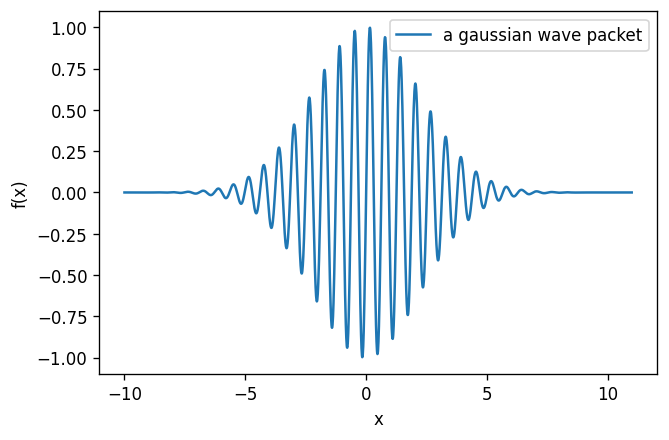

In [ ]:
fplot(x=np.arange(-10,11,0.01))

### Part 2. The analytical derivative of f(x) is  
  $$f'(x)=b{\rm cos}(bx)\cdot e^{-ax^2}-2ax{\rm sin}(bx)\cdot e^{-ax^2}\qquad\qquad(1)$$    
* **Write a Python function that calculates the derivative defined in equation
(2).**

In [ ]:
def f_derivate1(x, a=0.1, b=10):
    out2=b*np.cos(b*x)*np.exp(-a*x**2) - 2*a*x*np.sin(b*x)*np.exp(-a*x**2)
    return out2
f_derivate1(x=1)

-7.493783027703379

### Part 3.  
Next, we are going to write a Python function that calculates the numerical derivative of an *arbitrary* single-variable function f at a point x using finite differences. If f only depends on x, this is extremely easy: we can simply take f, x, and h (step-size) as input arguments to our derivative function. Assuming it is called calc_derivative, it could work something like this:

In [ ]:
#df_x = calc_derivative(f, x=1.0, h=1.0e-3)

However, the function in equation (1) depends on two additional input
parameters, a and b. We can of course add these two as extra arguments to the
derivative function, but then we would lose generality, for not every function has
the same two parameters. A way out of this dilemma could be to create a new
function each time you choose values for a and b, e.g:

In [ ]:
#def g(x):
# """
# The function g(x) = sin(10x) * exp(-0.1x^2).
# """
# return f(x, 0.1, 10.0)

Another possibility is to use the the args mechanism, which lets you pass
around a variable number of parameters to a function. An example of how this
works is:

In [ ]:
#def calc_derivative(f, x, h, *args):
# v return (f(x, *args) - f(x-h, *args))/h

* **Write a Python function that calculates the derivative of an arbitrary
function using the *forward difference* method**

In [ ]:
def f(x):
    return np.sin(10*x) * np.exp(-0.1*x**2)

def df(f,x,h):
    return (f(x+h) - f(x))/h    

* **Apply your function to the particular case of equation (1) and x = 1. Use
a suitable value of h, e.g. h = 1e − 2, and check that your estimate agrees
reasonably well with the *analytical solution*.**

In [ ]:
df(f,x=1,h=10**-2)

-7.220096595246589

### Part 4.
* **Write another Python function that calculates $f'(x)$ with the *central difference* method**

In [ ]:
def dfc(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)
dfc(f,x=1,h=10**-2)

-7.48156774953081

### Part 5. 
We want to quantify the error in our numerical estimates. To this end, we start by choosing a point at which to evaluate the numerical derivative of the function in equation (1), e.g., x = 1. Next:

* **Make a figure in which you plot the absolute error versus step size, h.**  
* **Vary the step size logarithmically between $10^{−16}$ and 1.**  
* **The figure should include one error curve for the forward difference method,
and another for the central difference methods.**

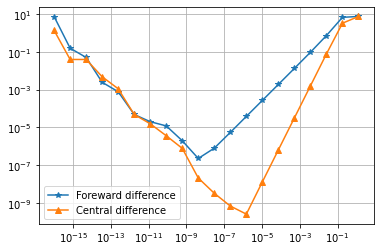

In [ ]:
h1=np.logspace(-16,0.1,20)
error=np.abs(f_derivate1(x=1)-df(f,x=1,h=h1))
error2=np.abs(f_derivate1(x=1)-dfc(f,x=1,h=h1))
plt.plot(h1,error,'-*',label='Foreward difference')
plt.plot(h1,error2,'-^',label='Central difference')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

### Part 6.
* **Comment on what you observe in the figure you made. When is the
numerical error smallest, and why? Is it what you expect from a theoretical
analysis using Taylor’s formula?**  
The errors of the center difference method are smaller than ones by the forward difference method. We got the smallest errors for h is closed to 1.4e-6. Yes, we just need continue to take higher order derivatives.

## Exercise 3, Part II: FD with Classes  
Implementing numerical algorithms with free functions, as we did in the previous exercise, is perfectly fine, and you can complete MOD510 by only coding in this way. However, experience has taught us that it is easy to introduce unnecessary errors when using this approach. In many cases you are better off by also using classes, and maybe object-oriented design. In this exercise, you will get some practice in coding with classes. This knowledge will come in handy in later projects, and in any case it is a good tool to have in your programming toolkit.  

Previously, we worked with a function having two input parameters, a and b. Implementing numerical algorithms using free functions was then simple. However, in a more complicated situation there could be dozens, or even hundreds, of parameters to keep track of. Most of these parameters might have fixed values, but frequently you will want to re-run a model with slightly different parameters than before. If you are not using classes, it is very easy to use the wrong parameters. This is especially true when working in a Jupyter notebook, since you might run code blocks in any order; if you forget to excute a cell that is responsible for updating one of your variables, your subsqeuent calculations will be wrong!  

### A Crash Course on Classes  
To get started, there are really only a couple of things you need to know. First, all of your classes should include a special function called __init__, in which you declare the variables (attributes) you wish an instance / object of the class to keep track of.  

Second, inside the class all class attributes should be prefixed with self, followed by a dot.  

Third, functions defined inside a class should have self as the first function argument. All of this is best understood via an example:

In [ ]:
#class WavePacket:
#  """
#  A class representation of a wave packet-function.
#  """
#  def __init__(self, a, b):
#    self.a = a
#    self.b = b
#  def f(self, x):
#    return np.sin(self.b*x)*np.exp(-self.a*x*x)
#  def plot(self, min=-10, max=10, dx=0.01):
#    """
#    A simple plotting routine for plotting f(x) in some range.
#    """
#    x = np.arange(min, max, dx)
#    y = self.f(x)
#    fig = plt.figure()
#    plt.plot(x, y)
#    plt.grid()

Besides the initialization method and a function that calculates $f(x)$ from equation, the class includes a simple plotting routine. A major difference from before is the following: when our function $f(x)$ is defined inside a class, we do not have to pass around a and b as arguments to the function f. Instead, we simply access a and b from inside the class itself (using the self-prefix).  
Below is an example of how to use the class:

In [ ]:
# Create two WavePacket objects, having their own parameter values
#WP1 = WavePacket(0.1, 2) # a=0.1, b=2
#WP2 = WavePacket(0.1, 10) # a = 0.1, b=10
# Evaluate the two functions at a specific point
#x = 1
#print(WP1.f(x))
#print(WP2.f(x))
# Plot the two functions
#WP1.plot()
#WP2.plot()

Although we had to write slightly more code, we hope you appreciate how easy this makes running parallel simulations with different parameters!  
### Part 1.  
* **Add another function (instance method) to the class above called df_fe.
This function should return the forward difference approximation to the
derivative of the function f at a point x given as input. Include the step-size
h as input argument (i.e., from the outside the class).**  
* **Add a second function, df_cd, which calculates the central difference
approximation.**  
### Part 2.  
* **Make a third function inside the class that plots the absolute error versus
step size for the two finite difference approximations. Use step sizes in the
range from $10^{−16}$ to 1 (with logarithmic spacing).**

In [3]:
class WavePacket:

    def __init__(self,a,b):
        self.a = a
        self.b = b
        
    def f(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)
    
    def f_derivate1(self,x):
        return self.b*np.cos(self.b*x)*np.exp(-self.a*x**2) - 2*self.a*x*np.sin(self.b*x)*np.exp(-self.a*x**2)
    
    
    def df(self,x,h):
        return (self.f(x+h) -self.f(x))/h

    def dfc(self,x,h):
        return (self.f(x+h)-self.f(x-h))/(2*h)
   
    def plot(self):
        
        x=1
        h=np.logspace(-16,0)
        error = np.abs(self.df(x,h)-self.f_derivate1(x))
        error2 =np.abs(self.dfc(x,h)-self.f_derivate1(x))
        fig = plt.figure()
        plt.loglog(h,error,'-*',label='foreward difference')
        plt.loglog(h,error2,'-^',label='central difference')
        plt.grid()
        plt.legend()
        
WP1 = WavePacket(0.1,10)
WP2 = WavePacket(0.1,10)

In [4]:
WP1.df(1,h=1e-2)

-7.220096595246589

In [5]:
WP2.dfc(1,h=1e-2)

-7.48156774953081

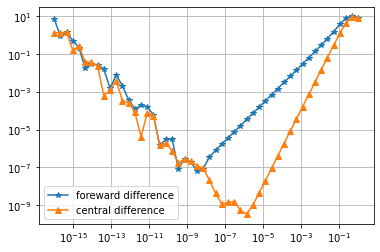

In [6]:
WP1.plot()

## Exercise 4: A song of ice and fire?  
There is currently a great deal of concern about global warming. Some critical issues are whether we are more likely to observe extreme local temperatures, increased frequencies of natural disasters like forest fires and droughts, and if there are "tipping points" in the climate system that are, at least on the human timescale, irreversible. One particular question to ask is: How much ice is likely to melt? And, what would be the consequence of ice melting for sea level rise (SLR)?  

Since most of the ice on Planet Earth is located in Antarctica, substantial effort has been spent in mapping the ice and the bedrock of this continent. Most of the data is freely available, and we can use them to investigate different scenarios.  

### Theory

To calculate SLR, we need to know not only how thick the ice is, but also its elevation above the bedrock. In this exercise you will see how we can use Python, together with available data and libraries, to do quite advanced calculations.  

Melting of an iceberg. Let us start by deriving a result that you may have seen before. We shall consider an iceberg that is floating and which is not impacted by any other forces than gravity. The total volume of ice in figure 2 is $V_f+V{^{disp}_{H2O}}$, where $V_f$ is the ice volume floating above the sea, and $V{^{disp}_{H2O}} is the volume of displaced sea water (submerged ice). According to Newton’s 2nd law, the total weight of ice is therefore  

$$W = m_{ice}g = \rho_{ice}V_{ice}g =\rho_{ice}(V_f  + V{^{disp}_{H2O}})g\qquad\qquad(3)$$  
where $\rho_{ice}$  is the density (mass divided by volume), and $g = 9.81m/s^2$ the gravitational constant. On the other hand, the Archimedean principle tells us that buoyancy is proportional to *the mass of displaced water*, hence another expression for the same weight is  

$$W = \rho_{w}V_{ice}g \qquad\qquad(4)$$  
where $\rho_{w}$ is the density of the surrounding sea-water. As the ice melts, it must be turned into an equal mass of liquid ice-water:  

$$m_{ice} = m_{ice water}$$  
$$\rho_{ice}V_{ice} =\rho_{ice} = \rho_{ice\,water}V_{ice\,water} \qquad\qquad(5)$$  
By combining the above equations, we therefore get:  

$$V{^{disp}_{H2O}}=\frac{\rho_{ice\,water}}{\rho_{w}}V_{ice\,water} \qquad\qquad(6)$$  
Therefore, the net contribution to SLR is captured by the volume change  

$$\Delta V\equiv V_{ice\,water}-V{^{disp}_{H2O}}=(1-\frac{\rho_{ice\,water}}{\rho_{w}})V_{ice\,water} \qquad\qquad(7)$$  
If the melted ice has the same density as seawater, it follows that there is *no increase in sea level*. On the other hand, if the density is lower than that of seawater, there is a contribution. Typically, the melting of ice dilutes the salinity of the ocean, which leads to a small increase in sea level.  
    ![jupyter](https://i.ibb.co/rvhn9Jt/3.png)  
$$\,\rm {\color{grey}{Figure\,3:\,A\,schematic\,illustration\,of\,an\,iceberg.\,V{^{disp}_{H2O}}\,is\,the\,volume\,of\,water\,displaced\,by\,the\,iceberg.}}$$  

**Freeboard**. The vast majority of ice in Antarctica is not freely floating. In addition to the salinity effect described above, the main contribution to SLR is from ice located above hydrostatic equilibrium. It is useful to introduce the concept of the freeboard, which is the height above seawater of a floating iceberg. Again referring to figure 3, the freeboard height, $h$, is  

$$h=(\frac{\rho_{w}}{\rho_{ice}}-1)h_{w} \qquad\qquad(8)$$  
For the bedmap2 dataset, the freeboard level can be computed from (figure 4)  
$$h=-({\rm surface}-{\rm thickness})\cdot(\frac{\rho_{w}}{\rho_{ice}}-1) \qquad\qquad(9)$$  
Note that this formula assumes that the bedrock is below sea-level.  

### Part 1.  
The code below is taken from the rockound library documentation:  
* **Run the code and reproduce figure 4.**

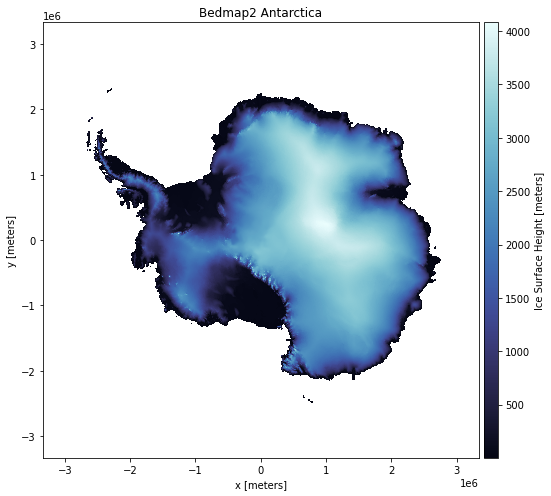

In [ ]:
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface","bed"])
plt.figure(figsize=(8, 7))
ax = plt.subplot(111)
bedmap.surface.plot.pcolormesh(ax=ax,cmap=cmocean.cm.ice,
cbar_kwargs=dict(pad=0.01, aspect=30))
plt.title("Bedmap2 Antarctica")
plt.tight_layout()
plt.show()

$$\,\rm {\color{grey}{Figure\,4:\,Visualization\,of\,the\,ice\,surface\,height\,in\,Antarctica.}}$$  
### Part 2.  
The Thwaites glacier, named after Fredrik T. Thwaites, is of particular interest. Also referred to as the Doomsday glacier, it is a fast moving glacier
(up to 4 km/year) at the coast of Antarctica, roughly 120 km wide. It is called
the Doomsday glacier because it is believed that it may trigger a collapse of
west Antarctica. We can use the bedmap2 dataset to view a cross section of the
glacier, $y = −0.5\cdot106$ and $x\in[−1.6\cdot10^6,−1.35\cdot10^6]$ and plot the values in the bed1d data array:  

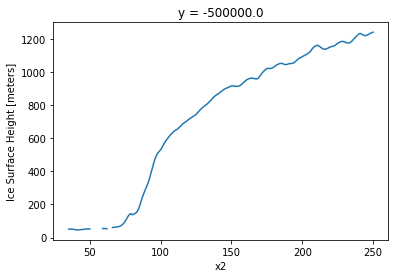

In [ ]:
bed1d = bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))
# Add a second x-coordinate to make prettier plots
# (shift x-axis to start at zero, and convert from m to km)
bed1d = bed1d.assign_coords({"x2":((bed1d.x+1.6e6)/1e3)})
bed1d.surface.plot(x="x2")

* **Use equation (9) to calculate the freeboard level.**

In [ ]:
freeboard=-(bed1d["surface"].values-bed1d["thickness"].values)*(1027/916.7-1) #density_seawater=1027kg/m3  density_ice=916.7kg/m3
freeboard

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,  26.35071452,
        25.62877714,  25.62877714,  25.38813134,  24.30522526,
        22.8613505 ,  22.01909021,  22.13941311,  23.34264209,
        24.30522526,  25.26780844,  25.50845424,  26.47103742,
        27.3132977 ,  27.67426639,  28.03523508,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,  29.11814116,
        28.03523508,  27.79458929,  28.87749536,       

* **Make a cross section plot of the ice thickness, bed rock, and freeboard
level, similar to (the right) figure 5**  
 ![jupyter](https://i.ibb.co/k18z5nJ/free-cross.png)  
$$\,\rm {\color{grey}{Figure\,5:\,(left)\,How\,to\,calculate\,the\,freeboard\,level.\,(right)\,Cross\,section\,plot\,of\,Thwaites\,glacier.}}$$  

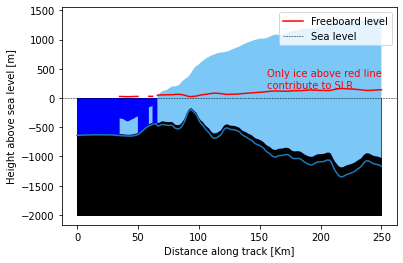

In [ ]:
distance=bed1d.x2
plt.plot(distance,bed1d.bed)
plt.plot(distance,freeboard,label="Freeboard level",color="r")
plt.axhline(y=0,color="black",linewidth=0.5,linestyle="dashed",label="Sea level")
plt.legend()
plt.figtext(0.6,0.6,'Only ice above red line\ncontribute to SLR',color='r',fontsize=10)
plt.xlabel("Distance along track [Km]")
plt.ylabel("Height above sea level [m]")
colors=["0000FF","000000","7BC8F6"]
plt.fill_between(distance,-2000,color='k')
plt.stackplot(distance,bed1d.bed,freeboard,bed1d.thickness,colors=colors)

* **Explain what you see. Is the shape of the bedrock important for sea level
rise?**   
The ice thickness varies inversely proportional to the height of the bed rock, and freeboard level is slightly above sea level. Thus, the shape of bed rock determines the volume of melted ice.[6]

### Part 3.
* **Use the whole data set to estimate the total SLR if all the ice of Antarctica melts.**

In [ ]:
Surface_values_Ant=bedmap['surface'].values
thickness_Ant=bedmap['thickness'].values 
freeboard_ant =-(Surface_values_Ant-thickness_Ant)*(1027/916.7-1) #density_seawater=1027kg/m3  density_ice=916.7kg/m3
Height_ant = np.nansum(Surface_values_Ant - freeboard_ant)
Vol_Ice=Height_ant*1000*1000
vol_ice_water=Vol_Ice*(916.7/1000)  #density_icewater=1000kg/m3  density_ice=916.7kg/m3
area_ocean = 361000000*1000000
SLR_Melt=vol_ice_water/area_ocean
print("SLR=",SLR_Melt,"m\nVolum of melted water=",vol_ice_water,"m3")

SLR= 68.14242101884591 m
 Volum of melted water= 2.4599413987803372e+16 m3


### Part 4.
* **How can we use the bedmap data to improve decision making?**  
The Antarctic Ice Sheet is a major control on world sea level and contains enough water to raise sea level by perhaps 68 m. The bedmap data provides mapping the topography of the surface of the Antarctic Ice Sheet in the last ten years. Adequate topographic data is of fundamental importance to many scientific disciplines active in Antarctica, including, ice sheet modelling, geoid interpretation, magnetic anomaly mapping, tectonic interpretation, ice core interpretation, oceanography, global isostasy and sea level prediction. An outstanding step forward for Antarctic science would be achieved in many disciplines of Antarctic science by the production of a new topographic model for Antarctica.[7]   

* **What are some limitations in your estimated calculation of sea level rise?**
The ice in each cell (1000×1000 meters) is not allways cube. Thus, the estimated calculation of SLR can be higher than reality.


## Conclusion and Discussion  

It is amazing how python can be such as useful tool to solve almost any kind of problem, its reach depends actually on how you see the things and how you can analyze them. 

Through this assignment, we are familiar with the way of combining markdown and code to write reports. During these two weeks, we reviewed how to implement a certain function and classes in different ways by python, numerical round-off and truncation errors and scientific computing, which are showed in the course. 
From the project we learnt about the main libraries and its main functions and how when we apply our knowledge and our analyze-skill we can solve problems in efficient ways. Also, we learnt that there are some methods that help us to calculate derivates in easy ways but there is still an error that we should quantify and take it into account, so we take good decisions based on that.

Finally, we land all the knowledge that we got from initial exercises and used it to understand the base of data provided in order to get to know how much ice can get melt from the Antarctic if the climate-change keep its fast pace.
It is quiet surprising that the sea level will rise 68 meters if the Arctic glacier melts completely. It is hard to imagine how many places will be submerged by a 68-meter rise in sea level. I hope that future exercises will have more opportunities to come into contact with these open resources, so that people can more intuitively understand the current status of the earth, instead of following the media to do meaningless emotional catharsis.

There are some limitations on this due to we are not taking all the variables that could be present here, but at least give us a clear view of what could happen if we do not to something about this.


## Self-Reflections  
**Reynel Villabona** – I liked the project cause when I first started, I was completely lost about what the course was about or what it will be focused on, this project helped me to land my ideas and give me a path to follow. I liked also how the project was approached because it started from the bases and they started to increase its “difficulty level”. I liked that equations that we saw in class we used them in the project, also the laboratories where we can solve our doubts. I feel sometimes lost in class because I do not see the relation of the equations to the real-life problems, I would like to start from the applications to the equations in order to see their functionality in real life and how they can help us in future and to make predictions. I suggest that theorical questions should be explained in a document so everyone has the same concept which I consider because they will be our bases in this course.  

**Jianing Shi** – Because of the previous courses, I am very familiar with R Markdown, so it is easier to get started with python on colab. At the beginning of the project, either jypiter notebook or VS Code was not been able to run normally on my pc due to firewall issues, so in the end I chose Colab. I think the biggest advantage of Colab compared with jypiter notebook and VS Code is that all the data are saved on Google space, which avoid transferring files through third-party software. And of course, we don't need to install it either.

**John Emeka Udegbunam** - There is literally not limit to what we can do with computers. However, internal precision errors and truncation errors can introduce inaccuracies when performing numerical calculations with computer programs such as Python and C++. For this reason, strong domain knowledge and analytical skills must complement results derived from numerical computations.

**Atanu Das** - Due to Visa issues & Quarantine process during this pandemic, I could not be able to attend the classes physically in the first two weeks. That’s why it was a bit difficult for me to understand the project topic properly at first but because of the cooperation of my group mates, the project has become understandable to me. From this project, I have learned how I can implement packages in Python programming, manipulating large data sets at a time and how class and function method works in code and the last part has given me a real life scenario of coding by using the abovementioned parameters regarding the Sea Level Rise because of the ice melting in Antarctica.  I wish I could get the situation to attend the class from the very first day and would perform better in this project. But surely, in my next project, I will try my best to cover up all of these lacking.

# References
  [1] Python docs. sys — System-specific parameters and functions. https://docs.python.org/3/library/sys.html.  
  [2] Wikipedia. IEEE 754. https://en.wikipedia.org/wiki/IEEE_754.  
  [3] Towards datas cience. How Floating Point Numbers Work. https://towardsdatascience.com/how-floating-point-numbers-work-1429907b6d1d.  
  [4] Daniel Lemire's blog. Why is 0.1 + 0.2 not equal to 0.3?. https://lemire.me/blog/2020/10/10/why-is-0-1-0-2-not-equal-to-0-3/.  
  [5] Geeksforgeeks. Problem in comparing Floating point numbers and how to compare them correctly? https://www.geeksforgeeks.org/problem-in-comparing-floating-point-numbers-and-how-to-compare-them-correctly/.  
  [6] Antarctic glaciers. Calculating glacier ice volumes and sea level equivalents. http://www.antarcticglaciers.org/glaciers-and-climate/estimating-glacier-contribution-to-sea-level-rise/.  
  [7] Bedmap. Introduction & Background. http://www.nerc-bas.ac.uk/public/aedc/bedmap/information/introduction.html.